<a href="https://colab.research.google.com/github/kamilareis/sitecar/blob/master/T%C3%B3picos_Especiais_em_Software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#autor: Kamila
#data: 05/10/2023
#Aula 1 prof André - Machine learning

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import loguniform

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron



PRED: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2]
RESPOSTA: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



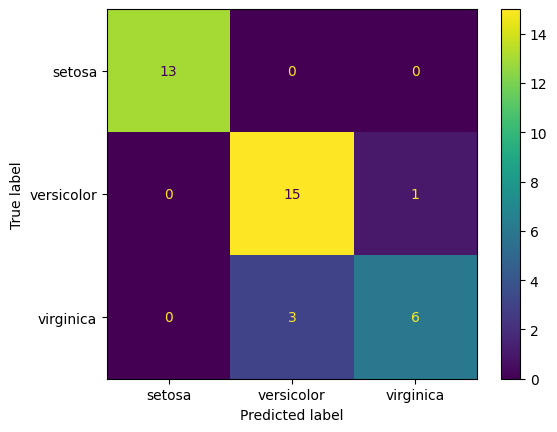

In [ ]:
#Coleta e preparação de dados
iris = load_iris()
x = iris.data #caracteristicas
y = iris.target # rotulos

#Divizão dos dados em treinamento e teste
x_train , x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#Escolha do algoritmo de Machine Learning
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

#Treinamento do Modelo.
clf.fit(x_train, y_train)

#Teste / Previsão do modelo
y_pred = clf.predict(x_test)

print(f'PRED: {y_pred}')
print(f'RESPOSTA: {y_test}')

#Analise dos Resultados.
print()
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)

classes = iris.target_names.tolist()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()


In [ ]:
#link usado em aula
#https://scikit-learn.org/stable/

# Aula 06/10/2023

##Exemplo de Machine Learning
###sklearn.svm.SVC
###sklearn.tree.DecisionTreeClassifier
###sklearn.neural_network.MLPClassifier
###sklearn.neighbors.KNeighborsClassifier
###sklearn.ensemble.RandomForestClassifier


testar as diferentes métricas

base de dados titanic
https://learnenough.s3.amazonaws.com/titanic.csv



Fitting the classifier to the training set
done in 0.111s
Best estimator found by grid search:
SVC(C=3380.9223047079668, class_weight='balanced', gamma=0.00021605768832447245)
PRED: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
RESPOSTA: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



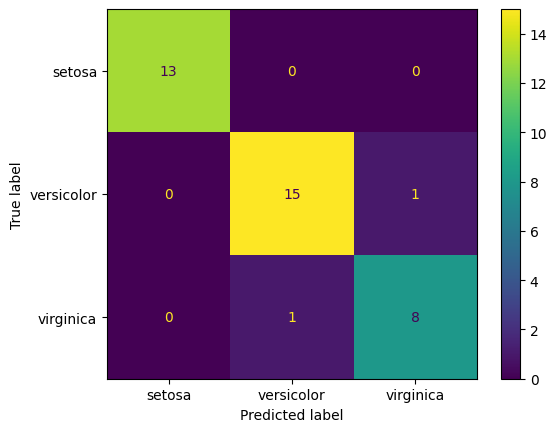

In [6]:
#Coleta e preparação de dados
iris = load_iris()
x = iris.data #caracteristicas
y = iris.target # rotulos

#Divizão dos dados em treinamento e teste
x_train , x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#Escolha do algoritmo de Machine Learning --Utilizando o SVC
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

#Treinamento do Modelo.
clf.fit(x_train, y_train)

#Teste / Previsão do modelo
y_pred = clf.predict(x_test)

print(f'PRED: {y_pred}')
print(f'RESPOSTA: {y_test}')

#Analise dos resultados.
print()
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)

classes = iris.target_names.tolist()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()

#AULA 19/10/2023
##Manipulação e Analise de dados da trajedia do Titanic

In [ ]:
url = 'https://learnenough.s3.amazonaws.com/titanic.csv'

#titanic = pd.read_csv(url)
titanic = pd.read_csv(url, index_col="Name")
titanic.head(22)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S


0
26.0
0.3838383838383838
 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
 


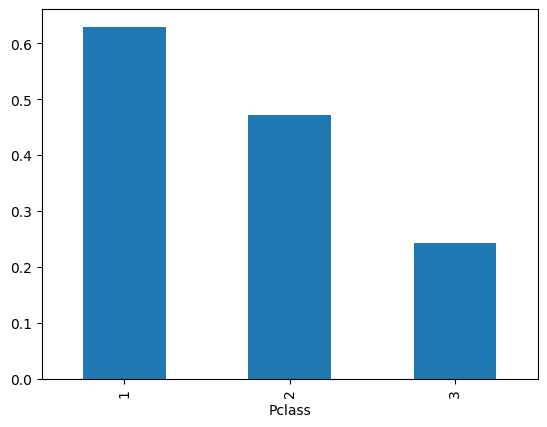

 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
 


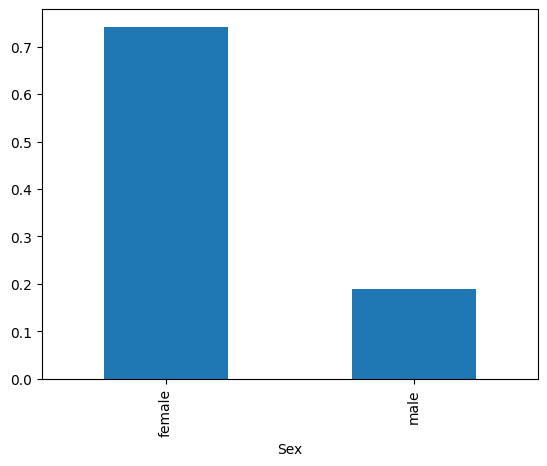

 
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.8+ KB
 
[3 1 2]
 
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   

In [ ]:
# exemplo de filtros
print(titanic.iloc[0]['Survived'])
print(titanic.iloc[2]['Age'])
print(titanic['Survived'].mean())
print(" ")
#agrupamento para saber a taxa de sobrevivencia por classe
print(titanic.groupby('Pclass')['Survived'].mean())
print(" ")
#grafico da taxa de sobreviventes por classe
survival_rates = titanic.groupby('Pclass')['Survived'].mean()
survival_rates.plot.bar()
plt.show()
print(" ")
#agrupamento para saber a taxa de sobrevivencia por sexo
print(titanic.groupby('Sex')['Survived'].mean())
print(" ")
#grafico da taxa de sobreviventes por sexo
survival_rates = titanic.groupby('Sex')['Survived'].mean()
survival_rates.plot.bar()
plt.show()
print(" ")
# informações da tabela
titanic.info()
print(" ")
#classe de embarque de todos
print(titanic['Pclass'].unique()) #unique faz filtra por um valor só!
print(" ")
print(titanic['Age'].unique())

In [ ]:
#idade minina de quem estava no barco
print(titanic['Age'].min())
#idade maxima de quem estava no barco
print(titanic['Age'].max())
#para tratar passageiros sem a informação de idade
print(titanic['Age'].notna())
print(" ")

#Taxa de sobrevincia por faixa de idade com detalhes
print(titanic['Age'].max() - titanic['Age'].min() / 7)
print(" ")

#mascara para tratar idade nula na tabela (!não vão apareceu na tabela!)
age_mask = titanic['Age'].notna()
valid_ages = titanic[age_mask]
#ordenar idades
sorted_by_age = valid_ages.sort_values(by='Age')
sorted_by_age.head(10)


0.42
80.0
Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                                True
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                     True
Name: Age, Length: 891, dtype: bool
 
79.94
 


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Thomas, Master. Assad Alexander",804,1,3,male,0.42,0,1,2625,8.5167,NaN,C
"Hamalainen, Master. Viljo",756,1,2,male,0.67,1,1,250649,14.5000,NaN,S
"Baclini, Miss. Eugenie",645,1,3,female,0.75,2,1,2666,19.2583,NaN,C
"Baclini, Miss. Helene Barbara",470,1,3,female,0.75,2,1,2666,19.2583,NaN,C
"Caldwell, Master. Alden Gates",79,1,2,male,0.83,0,2,248738,29.0000,NaN,S
"Richards, Master. George Sibley",832,1,2,male,0.83,1,1,29106,18.7500,NaN,S
"Allison, Master. Hudson Trevor",306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S
"Mallet, Master. Andre",828,1,2,male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
"Nakid, Miss. Maria (""Mary"")",382,1,3,female,1.00,0,2,2653,15.7417,NaN,C


Age Range
(0.34, 11.789]      0.573529
(11.789, 23.157]    0.359551
(23.157, 34.526]    0.399142
(34.526, 45.894]    0.417910
(45.894, 57.263]    0.411765
(57.263, 68.631]    0.346154
(68.631, 80.0]      0.142857
Name: Survived, dtype: float64
 


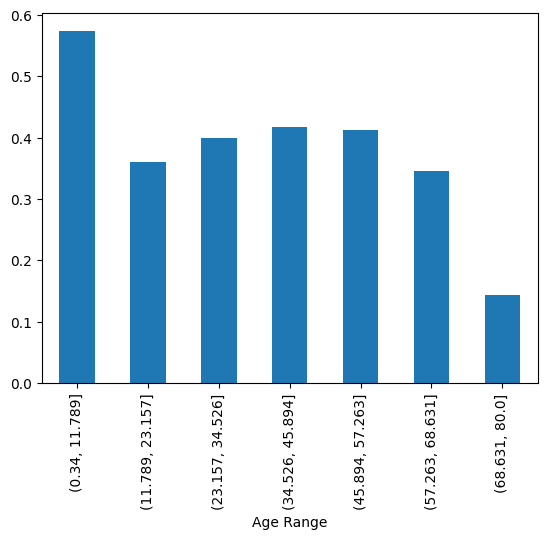

In [ ]:
#
sorted_by_age['Age Range'] = pd.cut(sorted_by_age['Age'], 7)
#sorted_by_age.head(10)

#media de sobrevivencia para cada faixa etaria
survival_rates = sorted_by_age.groupby('Age Range')['Survived'].mean()
print(survival_rates)
print(" ")
#grafico da media de sobrevivencia para cada faixa etaria
survival_rates.plot.bar()
plt.show()

In [ ]:
print(titanic[titanic['Sex'] == 'male']['Age'].mean())
print(titanic[titanic['Sex'] == 'female']['Age'].mean())
print(" ")

# Filtra os passageiros dada uma coluna (sexo)
male_passengers = titanic[titanic['Sex'] == 'male']
female_passengers = titanic[titanic['Sex'] == 'female']

# Para cada tabela (M/F) filtrar novamente apenas pelos que tem idade válida
valid_male_ages = male_passengers[male_passengers['Age'].notna()]
valid_female_ages = female_passengers[female_passengers['Age'].notna()]

# Ordena a tabela baseado em uma coluna especifica, no caso idade (Age)
m_sorted_by_age = valid_male_ages.sort_values(by='Age')
f_sorted_by_age = valid_female_ages.sort_values(by='Age')

# Divide ela em 7 faixas etárias
m_sorted_by_age['Age Range'] = pd.cut(m_sorted_by_age['Age'], 7)
f_sorted_by_age['Age Range'] = pd.cut(f_sorted_by_age['Age'], 7)

# Calcula a taxa de sobrevivência para cada uma das faixas etárias
m_survival_rates = m_sorted_by_age.groupby('Age Range')['Survived'].mean()
f_survival_rates = f_sorted_by_age.groupby('Age Range')['Survived'].mean()







30.72664459161148
27.915708812260537
 


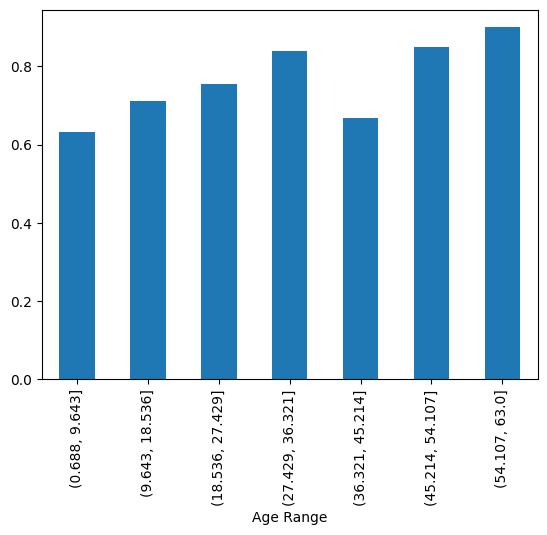

In [ ]:
#grafico feminino
f_survival_rates.plot.bar()
plt.show()

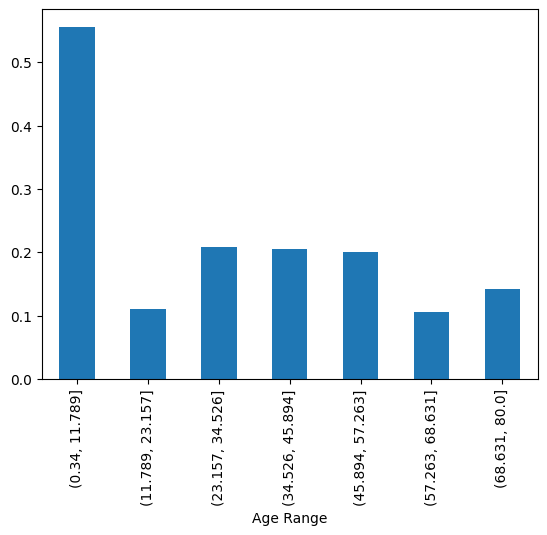

In [ ]:
#grafico masculino
m_survival_rates.plot.bar()
plt.show()

#Parte 2 - REVENDO MACHINE LEARNING
##Utilziando os dados do Titanic


In [ ]:
titanic = pd.read_csv(url)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
dropped_columns = ['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

for column in dropped_columns:
  titanic = titanic[titanic[column].notna()]

  print('-'*30)
  print(titanic.head(1))

------------------------------
   PassengerId  Survived  Pclass  \
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch    Ticket     Fare Cabin Embarked  
1      0  PC 17599  71.2833   C85        C  
------------------------------
   PassengerId  Survived  Pclass  \
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch    Ticket     Fare Cabin Embarked  
1      0  PC 17599  71.2833   C85        C  
------------------------------
   PassengerId  Survived  Pclass  \
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch    Ticket     Fare Cabin Embarked 